# EDA

Bus: Jan. 01, 2014 - May 31, 2020

Street car: Jan. 02 2014 - May 31 2020

Subway: Jan. 01 2014 - June 2020 

~700k records of incident delay for the past 6 year 

# Imports

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.style as style
import seaborn as sns

In [193]:
bus_df = pd.read_csv('./data/bus_cleaned.csv')
streetcar_df = pd.read_csv('./data/streetcar_cleaned.csv')
subway_df = pd.read_csv('./data/subway_cleaned.csv')

## Overview

In [195]:
bus_df.head()

,report_date,Route,Time,Day,Location,Incident,delay_min,gap_min,Direction,Vehicle,report_year,report_month,report_day,time_hour,time_min,at_station,delay_type,direction_simp
0,2014-01-01,95,12:23:00 AM,Wednesday,YORK MILLS STATION,Mechanical,10.0,20.0,E,1734.0,2014,1,1,0,23,1,short,E
1,2014-01-01,102,12:55:00 AM,Wednesday,ENTIRE RUN FOR ROUTE,General Delay,33.0,66.0,b/w,8110.0,2014,1,1,0,55,0,long,W
2,2014-01-01,54,1:28:00 AM,Wednesday,LAWRENCE AND WARDEN,Mechanical,10.0,20.0,WB,7478.0,2014,1,1,1,28,0,short,W
3,2014-01-01,112,1:30:00 AM,Wednesday,KIPLING STATION,Emergency Services,18.0,36.0,N,8084.0,2014,1,1,1,30,1,medium,N
4,2014-01-01,24,1:37:00 AM,Wednesday,VP AND ELLESMERE,Investigation,10.0,20.0,n,7843.0,2014,1,1,1,37,0,short,N


In [5]:
streetcar_df.head()

,report_date,Route,Time,Day,Location,Incident,delay_min,gap_min,Direction,Vehicle,report_year,report_month,report_day,time_hour,time_min,at_station,delay_type,direction_simp
0,2014-01-02,505,6:31:00 AM,Thursday,DUNDAS AND RONCESVALLES,Late Leaving Garage,4.0,8.0,E/B,4018.0,2014,1,2,6,31,0,short,E
1,2014-01-02,504,12:43:00 PM,Thursday,KING AND SHAW,Utilized Off Route,20.0,22.0,E/B,4128.0,2014,1,2,12,43,0,medium,E
2,2014-01-02,501,2:01:00 PM,Thursday,KINGSTON ROAD AND BINGHAM,Held By,13.0,19.0,W/B,4016.0,2014,1,2,14,1,0,medium,W
3,2014-01-02,504,2:22:00 PM,Thursday,KING ST AND RONCESVALLES AVE,Investigation,7.0,11.0,W/B,4175.0,2014,1,2,14,22,0,short,W
4,2014-01-02,504,4:42:00 PM,Thursday,KING AND BATHURST,Utilized Off Route,3.0,6.0,E/B,4080.0,2014,1,2,16,42,0,short,E


In [6]:
subway_df.head()

,report_date,Time,Day,Station,Code,delay_min,gap_min,Bound,Line,Vehicle,report_year,report_month,report_day,time_hour,time_min,at_station,line_simp,delay_type
0,2020-04-01,12:04:00 AM,Wednesday,BLOOR STATION,SUDP,6,11,S,YU,5766,2020,4,1,0,4,1,YU,short
1,2020-04-01,12:06:00 AM,Wednesday,FINCH STATION,MUI,5,10,S,YU,5401,2020,4,1,0,6,1,YU,short
2,2020-04-01,1:55:00 AM,Wednesday,FINCH STATION,MUIS,0,0,NaN,YU,0,2020,4,1,1,55,1,YU,short
3,2020-04-01,2:37:00 AM,Wednesday,YONGE SHP STATION,TUMVS,0,0,W,SHP,6186,2020,4,1,2,37,1,SHP,short
4,2020-04-01,5:14:00 AM,Wednesday,WILSON STATION,MUNOA,3,5,S,YU,0,2020,4,1,5,14,1,YU,short


In [194]:
print("There's %s records of incident and %s columns in the bus dataset."%(bus_df.shape[0],bus_df.shape[1]))
print("There's %s records of incident and %s columns in the streecar dataset."%(streetcar_df.shape[0],streetcar_df.shape[1]))
print("There's %s records of incident and %s columns in the subway dataset."%(subway_df.shape[0],subway_df.shape[1]))
print("There are %d records of incident in total."%(bus_df.shape[0]+streetcar_df.shape[0]+subway_df.shape[0]))

There's 461405 records of incident and 18 columns in the bus dataset.
There's 81037 records of incident and 18 columns in the streecar dataset.
There's 113389 records of incident and 18 columns in the subway dataset.
There are 655831 records of incident in total.


In [ ]:
bus_df.descri

## Check Missing values

In [7]:
missing_vals_bus = bus_df.isnull().sum() / bus_df.shape[0]
missing_vals_bus[missing_vals_bus > 0].sort_values(ascending=False)

Vehicle           0.149409
Direction         0.021036
direction_simp    0.004710
Incident          0.002022
Location          0.001604
gap_min           0.001218
dtype: float64

In [8]:
missing_vals_streetcar = streetcar_df.isnull().sum() / streetcar_df.shape[0]
missing_vals_streetcar[missing_vals_streetcar > 0].sort_values(ascending=False)

Vehicle           0.057394
Direction         0.003702
Location          0.002986
gap_min           0.000716
direction_simp    0.000654
dtype: float64

In [9]:
missing_vals_subway = subway_df.isnull().sum() / subway_df.shape[0]
missing_vals_subway[missing_vals_subway > 0].sort_values(ascending=False)

Bound        0.223699
line_simp    0.004480
Line         0.003642
Code         0.000009
dtype: float64

In [10]:
subway_df[subway_df['Bound'].isnull()]

,report_date,Time,Day,Station,Code,delay_min,gap_min,Bound,Line,Vehicle,report_year,report_month,report_day,time_hour,time_min,at_station,line_simp,delay_type
2,2020-04-01,1:55:00 AM,Wednesday,FINCH STATION,MUIS,0,0,NaN,YU,0,2020,4,1,1,55,1,YU,short
11,2020-04-01,6:08:00 AM,Wednesday,BATHURST STATION,MUIS,0,0,NaN,BD,0,2020,4,1,6,8,1,BD,short
24,2020-04-01,7:10:00 AM,Wednesday,KENNEDY BD STATION,MUIS,0,0,NaN,BD,0,2020,4,1,7,10,1,BD,short
30,2020-04-01,10:21:00 AM,Wednesday,FINCH STATION,MUIS,0,0,NaN,YU,0,2020,4,1,10,21,1,YU,short
46,2020-04-01,5:59:00 PM,Wednesday,DUNDAS WEST STATION,SUROB,0,0,NaN,BD,0,2020,4,1,17,59,1,BD,short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113376,2018-09-30,4:55:00 PM,Sunday,COLLEGE STATION,MUIRS,0,0,NaN,YU,0,2018,9,30,16,55,1,YU,short
113377,2018-09-30,4:58:00 PM,Sunday,SHERBOURNE STATION,MUNCA,0,0,NaN,BD,0,2018,9,30,16,58,1,BD,short
113381,2018-09-30,7:45:00 PM,Sunday,SHEPPARD WEST STATION,PUMEL,0,0,NaN,YU,0,2018,9,30,19,45,1,YU,short
113385,2018-09-30,10:00:00 PM,Sunday,YUSBDSHEPPARD SUBWAY,MUO,0,0,NaN,YU/BD,0,2018,9,30,22,0,0,BD,short


- There's a lot of vehicle number missing in the bus dataset at about 15%.
- Bound column in the subway dataset has 22% missing values.

### Report date counts

In [11]:
bus_df.report_date.value_counts().max()

619

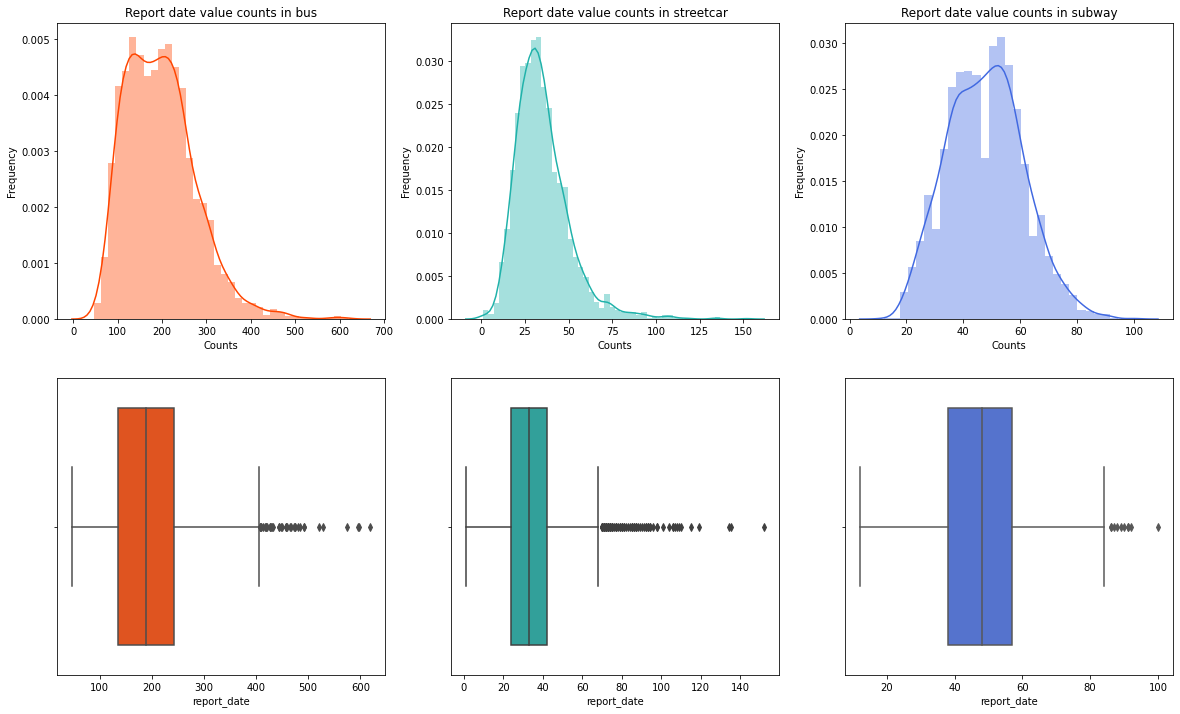

In [12]:
Report_date_counts_bus = bus_df.report_date.value_counts()
Report_date_counts_streetcar = streetcar_df.report_date.value_counts()
Report_date_counts_subway = subway_df.report_date.value_counts()
fig, ax = plt.subplots(2,3, figsize=(20,12))

sns.distplot(Report_date_counts_bus, ax=ax[0,0], color="orangered", kde=True);
ax[0,0].set_xlabel("Counts")
ax[0,0].set_ylabel("Frequency")
ax[0,0].set_title("Report date value counts in bus");

sns.distplot(Report_date_counts_streetcar, ax=ax[0,1], color="lightseagreen", kde=True);
ax[0,1].set_xlabel("Counts")
ax[0,1].set_ylabel("Frequency")
ax[0,1].set_title("Report date value counts in streetcar");

sns.distplot(Report_date_counts_subway, ax=ax[0,2], color="royalblue", kde=True);
ax[0,2].set_xlabel("Counts")
ax[0,2].set_ylabel("Frequency")
ax[0,2].set_title("Report date value counts in subway");

sns.boxplot(Report_date_counts_bus, ax=ax[1,0], color="orangered");
sns.boxplot(Report_date_counts_streetcar, ax=ax[1,1], color="lightseagreen");
sns.boxplot(Report_date_counts_subway, ax=ax[1,2], color="royalblue");


In [13]:
np.quantile(Report_date_counts_subway, 0.75) - np.quantile(Report_date_counts_subway, 0.25)

19.0

### Route counts

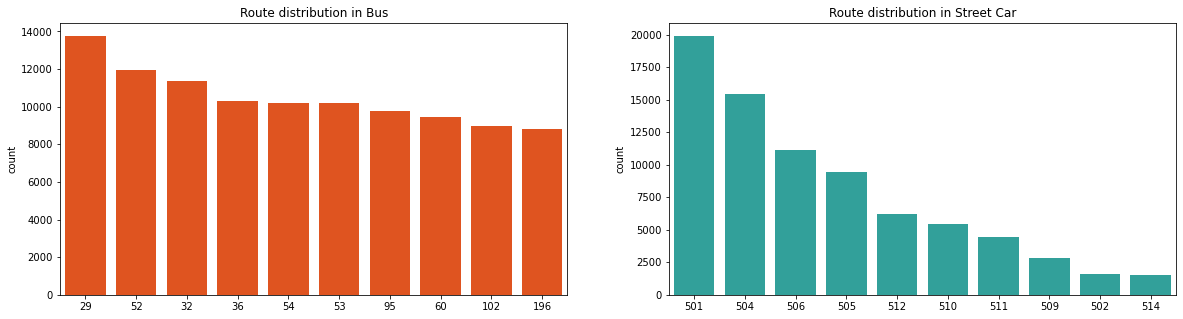

In [147]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(bus_df.Route , order= bus_df.Route.value_counts().iloc[:10].index, color="orangered", ax=ax[0]);
ax[0].set_xlabel("");
ax[0].set_title("Route distribution in Bus");

sns.countplot(streetcar_df.Route, order= streetcar_df.Route.value_counts().iloc[:10].index, color="lightseagreen", ax=ax[1]);
ax[1].set_xlabel("");
ax[1].set_title("Route distribution in Street Car");

- Bus: 29 Dufferin, 52 Lawrence West and 32 Eglinton West
- Street Car: 501 Queen, 504 King and 506 Carlton

### Time counts

In [14]:
bus_df.Time.value_counts()

3:00:00 PM    9280
4:00:00 PM    8965
8:00:00 AM    6547
2:00:00 PM    6219
1:00:00 PM    4126
              ... 
3:59:00 AM      19
4:19:00 AM      19
3:56:00 AM      18
4:11:00 AM      17
3:49:00 AM      15
Name: Time, Length: 1440, dtype: int64

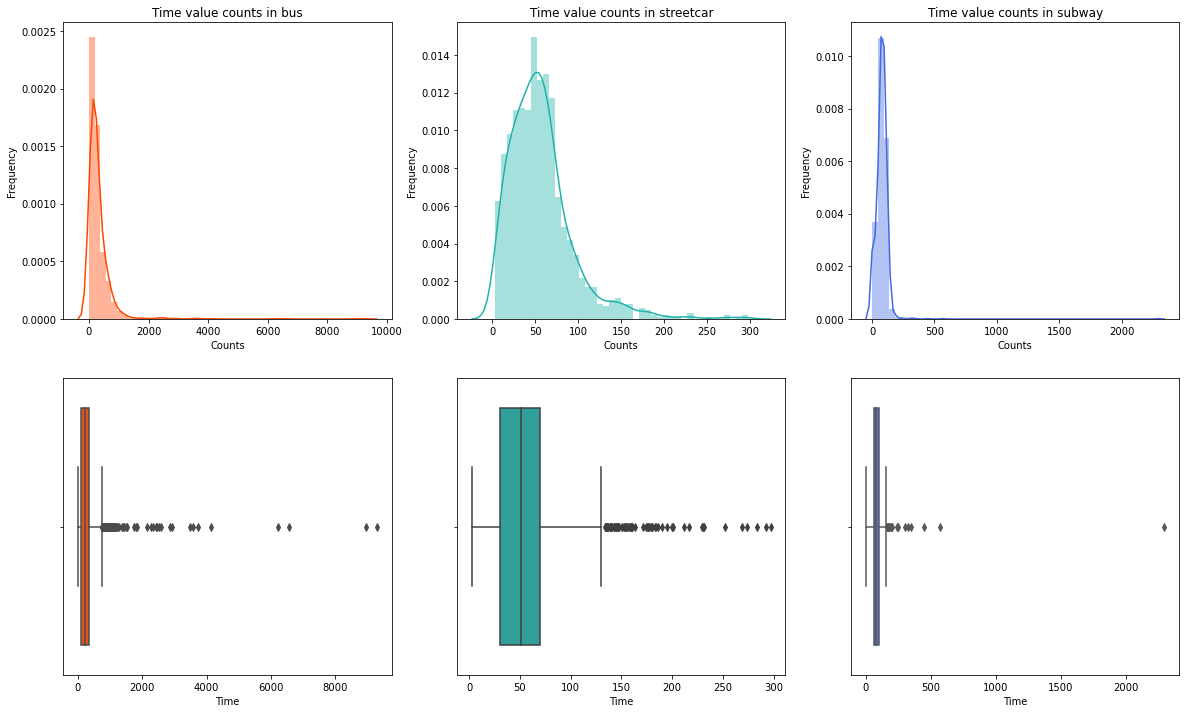

In [15]:
Time_counts_bus = bus_df.Time.value_counts()
Time_counts_streetcar = streetcar_df.Time.value_counts()
Time_counts_subway = subway_df.Time.value_counts()
fig, ax = plt.subplots(2,3, figsize=(20,12))

sns.distplot(Time_counts_bus, ax=ax[0,0], color="orangered", kde=True);
ax[0,0].set_xlabel("Counts")
ax[0,0].set_ylabel("Frequency")
ax[0,0].set_title("Time value counts in bus");

sns.distplot(Time_counts_streetcar, ax=ax[0,1], color="lightseagreen", kde=True);
ax[0,1].set_xlabel("Counts")
ax[0,1].set_ylabel("Frequency")
ax[0,1].set_title("Time value counts in streetcar");

sns.distplot(Time_counts_subway, ax=ax[0,2], color="royalblue", kde=True);
ax[0,2].set_xlabel("Counts")
ax[0,2].set_ylabel("Frequency")
ax[0,2].set_title("Time value counts in subway");

sns.boxplot(Time_counts_bus, ax=ax[1,0], color="orangered");
sns.boxplot(Time_counts_streetcar, ax=ax[1,1], color="lightseagreen");
sns.boxplot(Time_counts_subway, ax=ax[1,2], color="royalblue");

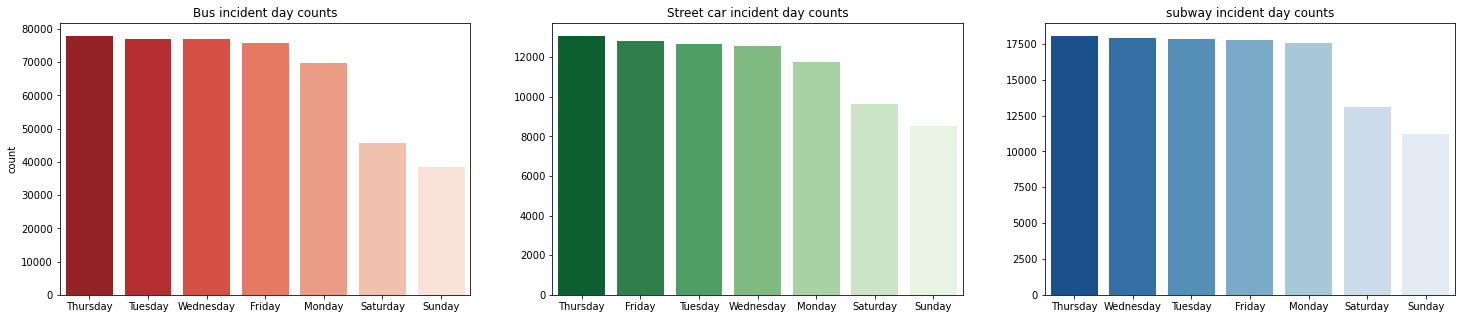

In [16]:
fig, ax = plt.subplots(1,3,figsize=(25,5))
sns.countplot(bus_df.Day, palette="Reds_r", ax=ax[0], order = bus_df.Day.value_counts().index);
ax[0].set_xlabel('')
ax[0].set_title("Bus incident day counts");

sns.countplot(streetcar_df.Day, palette="Greens_r", ax=ax[1], order = streetcar_df.Day.value_counts().index);
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title("Street car incident day counts");

sns.countplot(subway_df.Day, palette="Blues_r", ax=ax[2], order = subway_df.Day.value_counts().index);
ax[2].set_xlabel('')
ax[2].set_ylabel('')
ax[2].set_title("subway incident day counts");

### Top 10 Location and station

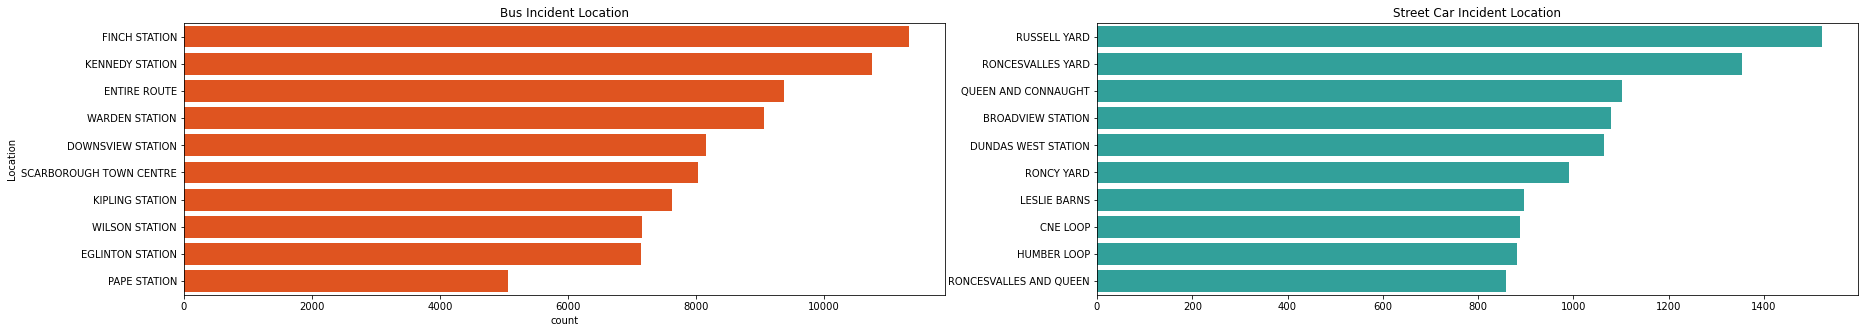

In [17]:
fig, ax = plt.subplots(1,2,figsize=(30,5))

sns.countplot(y=bus_df.Location, order= bus_df.Location.value_counts().iloc[:10].index, ax=ax[0], color="orangered");
ax[0].set_title("Bus Incident Location");
# labels = ax[0].get_xticklabels();
# ax[0].set_xticklabels(labels, rotation=90)

sns.countplot(y=streetcar_df.Location, order= streetcar_df.Location.value_counts().iloc[:10].index, ax=ax[1], color="lightseagreen");
ax[1].set_title("Street Car Incident Location");
ax[1].set_xlabel('');
ax[1].set_ylabel('');

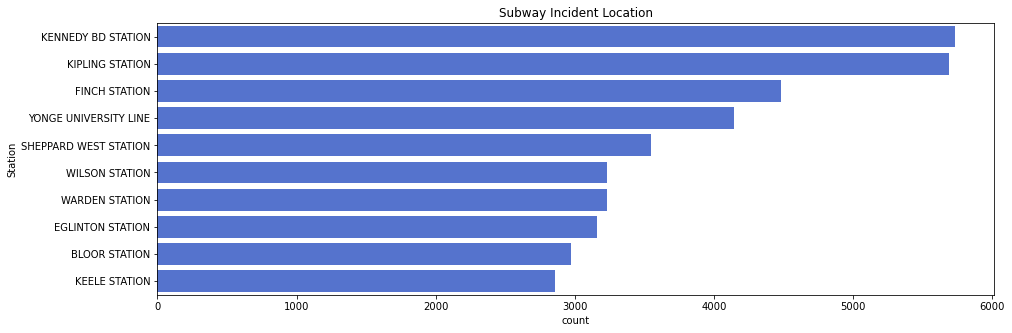

In [18]:
fig, ax =plt.subplots(1,1,figsize=(15,5))
sns.countplot(y=subway_df.Station, order= subway_df.Station.value_counts().iloc[:10].index, ax=ax, color="royalblue");
ax.set_title("Subway Incident Location");

Although Younge University Line is the fourth on our list, there's actually no delays on the record

### Incident and code

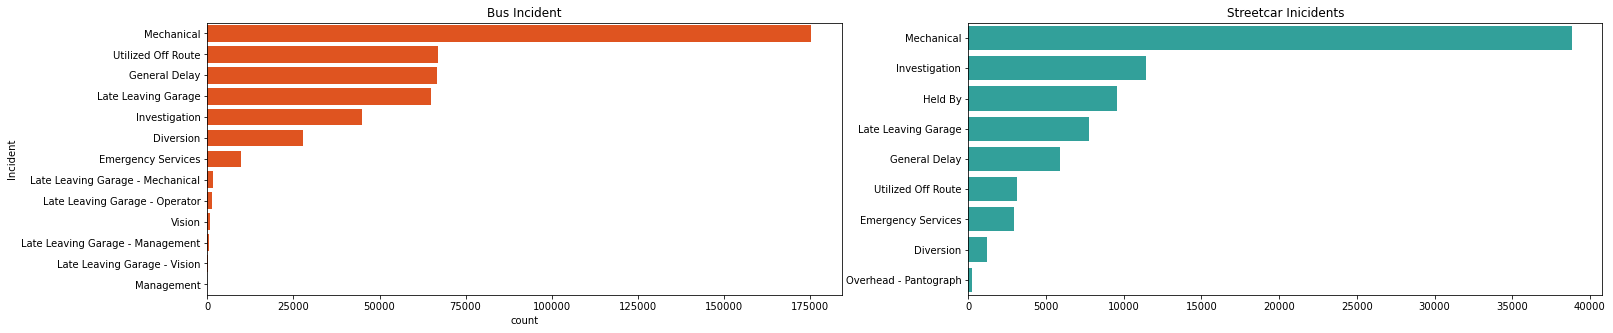

In [19]:
fig, ax = plt.subplots(1,2,figsize=(25,5))

sns.countplot(y=bus_df.Incident, order= bus_df.Incident.value_counts().index, ax=ax[0], color="orangered");
ax[0].set_title("Bus Incident");
ax[0].set_xlabel('');
# labels = ax[0].get_xticklabels();
# ax[0].set_xticklabels(labels, rotation=90)

sns.countplot(y=streetcar_df.Incident, order= streetcar_df.Incident.value_counts().index, ax=ax[1], color="lightseagreen");
ax[1].set_title("Streetcar Inicidents")
ax[1].set_xlabel('');
ax[1].set_ylabel('');

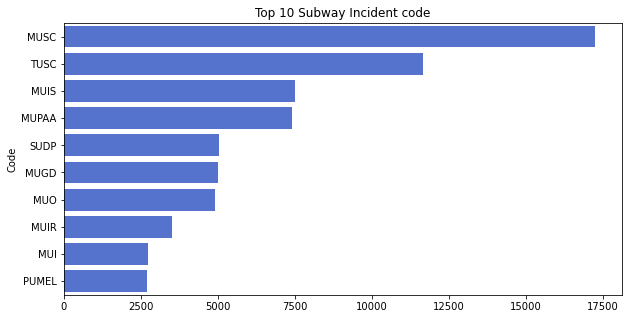

In [20]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.countplot(y=subway_df.Code, order= subway_df.Code.value_counts().iloc[:10].index, color="royalblue")
ax.set_title("Top 10 Subway Incident code")
ax.set_xlabel('');

Read more about subway delay:
https://www.lowandhigh.xyz/magazine/2019/2/7/dont-be-so-quick-to-blame-the-ttc-for-delays-on-the-subway#:~:text=Miscellaneous%20speed%20control%20is%20when,control%20to%20reset%20and%20proceed

According to TTC subway delay code description:
- MUSC: Miscellaneous Speed Control
- TUSC: Operator Overspeeding
- MUPAA: Passenger Assistance Alarm Activated - No Trouble Found
- MUIS: Injured or ill Customer (In Station) - Transported
- SUDP: Disorderly Patron
- MUO: Miscellaneous Other
- MUGD: Miscellaneous General Delays
- MUIR: Injured or ill Customer (On Train) - Medical Aid Refused
- MUI: Injured or ill Customer (On Train) - Transported
- TUMVS: Operator Violated Signal


### Delay

In [40]:
bus_df.shape

(461405, 18)

In [42]:
#bus_df[~bus_df.isin(['NaN','Inf']).any(axis=1)]

c:\users\jason\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """
c:\users\jason\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


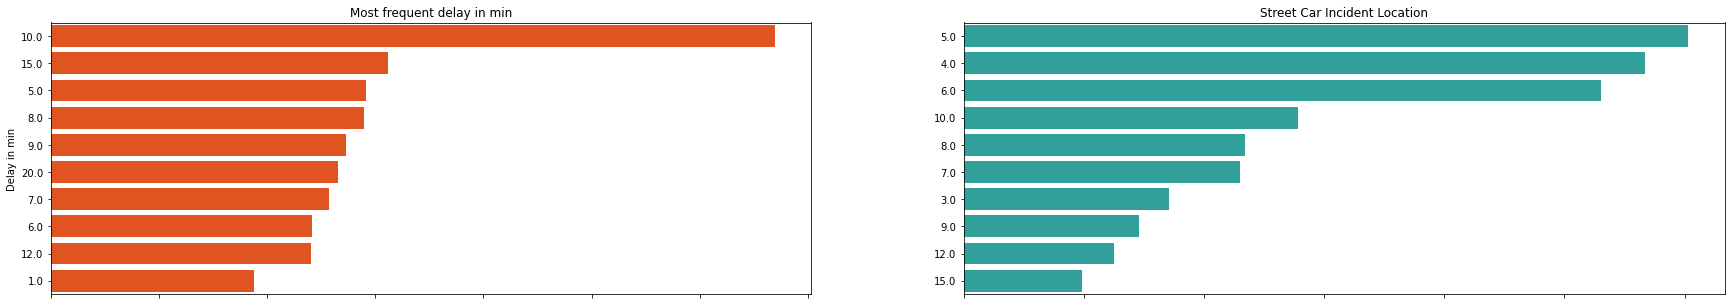

In [55]:
fig, ax = plt.subplots(1,2,figsize=(30,5))

sns.countplot(y=bus_df.delay_min, order= bus_df.delay_min.value_counts().iloc[:10].index, ax=ax[0], color="orangered");
labels = ax[0].get_xticklabels();
ax[0].set_xticklabels(labels, rotation=90);
ax[0].set_title("Most frequent delay in min")
ax[0].set_xlabel('');
ax[0].set_ylabel('Delay in min')

sns.countplot(y=streetcar_df.delay_min, order= streetcar_df.delay_min.value_counts().iloc[:10].index, ax=ax[1], color="lightseagreen");
labels = ax[1].get_xticklabels();
ax[1].set_xticklabels(labels, rotation=90);
ax[1].set_title("Street Car Incident Location");
ax[1].set_xlabel('');
ax[1].set_ylabel('');

Text(0.5, 0, 'delay in min')

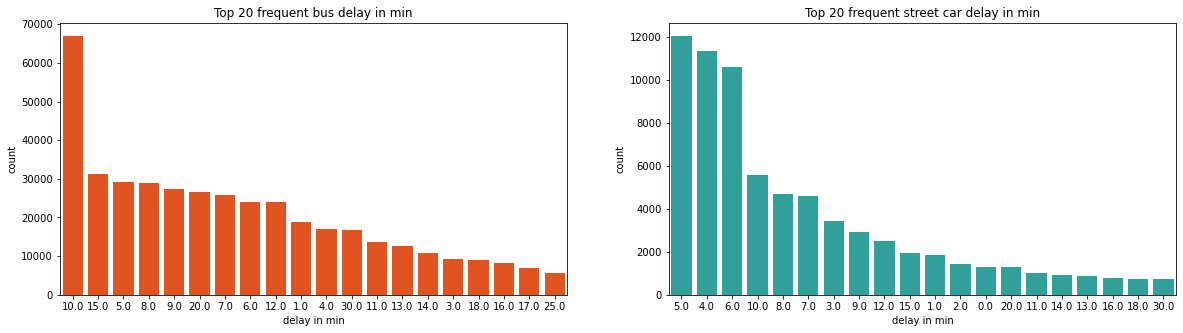

In [75]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(bus_df.delay_min, order=bus_df.delay_min.value_counts().iloc[:20].index, ax=ax[0], color="orangered");
ax[0].set_title("Top 20 frequent bus delay in min")
ax[0].set_xlabel("delay in min")

sns.countplot(streetcar_df.delay_min, order=streetcar_df.delay_min.value_counts().iloc[:20].index, ax=ax[1], color="lightseagreen");
ax[1].set_title("Top 20 frequent street car delay in min")
ax[1].set_xlabel("delay in min")


Text(0, 0.5, 'Delay in min')

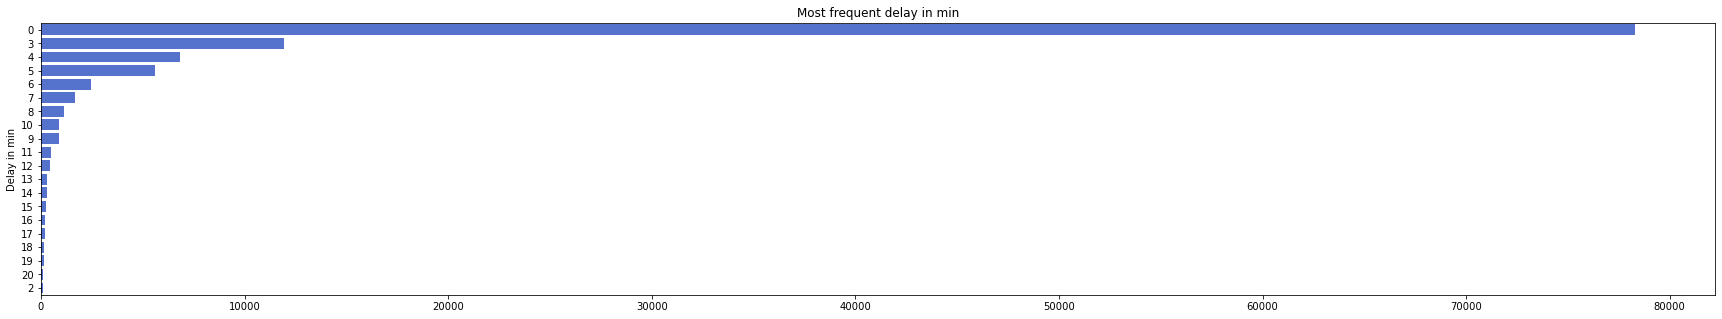

In [88]:
fig, ax = plt.subplots(1,1,figsize=(30,5))

sns.countplot(y=subway_df.delay_min, order= subway_df.delay_min.value_counts().iloc[:20].index, color="royalblue");
ax.set_title("Most frequent delay in min")
ax.set_xlabel('');
ax.set_ylabel('Delay in min')

### Report vehicle

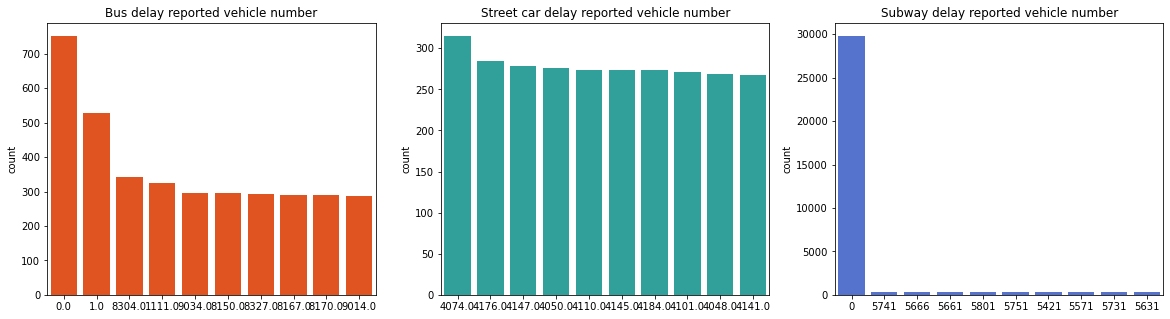

In [136]:
fig, ax = plt.subplots(1,3,figsize=(20,5))

sns.countplot(bus_df.Vehicle, order= bus_df.Vehicle.value_counts().iloc[:10].index, color="orangered", ax=ax[0]);
ax[0].set_xlabel("");
ax[0].set_title("Bus delay reported vehicle number");

sns.countplot(streetcar_df.Vehicle,  order= streetcar_df.Vehicle.value_counts().iloc[:10].index, color="lightseagreen", ax=ax[1]);
ax[1].set_xlabel("");
ax[1].set_title("Street car delay reported vehicle number");

sns.countplot(subway_df.Vehicle,order= subway_df.Vehicle.value_counts().iloc[:10].index, color="royalblue", ax=ax[2]);
ax[2].set_xlabel("");
ax[2].set_title("Subway delay reported vehicle number");

### Report date in Year (2014 - 2020)

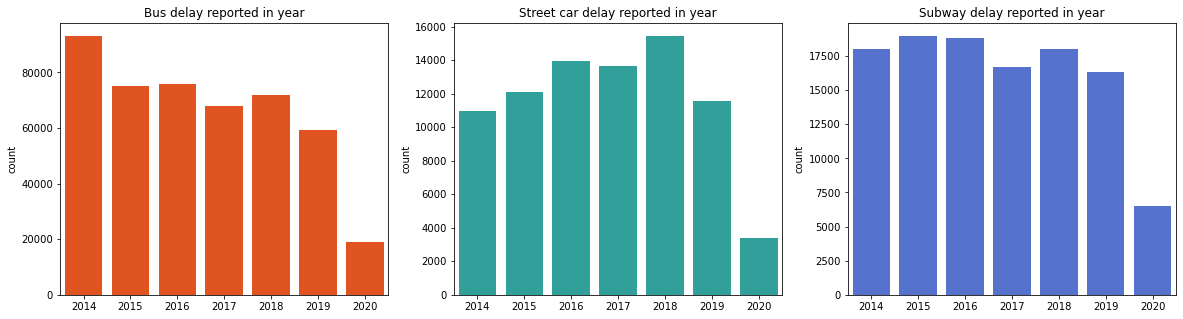

In [89]:
fig, ax = plt.subplots(1,3,figsize=(20,5))

sns.countplot(bus_df.report_year, color="orangered", ax=ax[0]);
ax[0].set_xlabel("");
ax[0].set_title("Bus delay reported in year");

sns.countplot(streetcar_df.report_year, color="lightseagreen", ax=ax[1]);
ax[1].set_xlabel("");
ax[1].set_title("Street car delay reported in year");

sns.countplot(subway_df.report_year, color="royalblue", ax=ax[2]);
ax[2].set_xlabel("");
ax[2].set_title("Subway delay reported in year");

- Keep in mind that we only have 6 months of data in 2020 and there's a pandemic in 2020.

### Report date in Month 

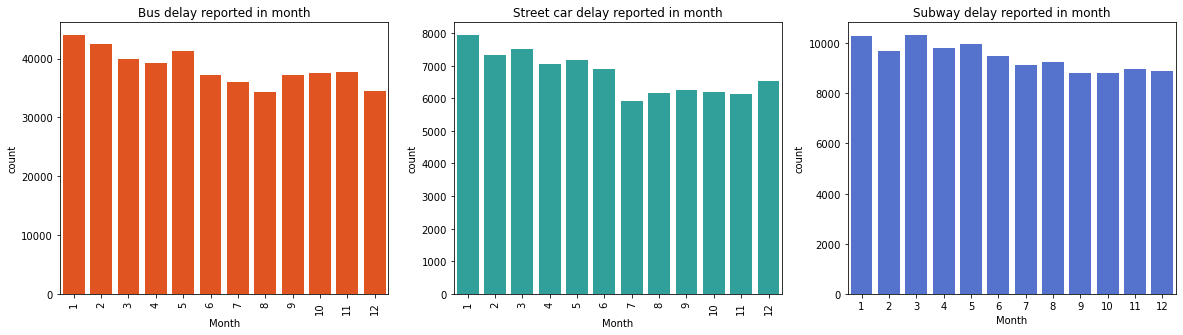

In [92]:
fig, ax = plt.subplots(1,3,figsize=(20,5))

sns.countplot(bus_df.report_month, color="orangered", ax=ax[0]);
ax[0].set_xlabel("Month");
ax[0].set_title("Bus delay reported in month");

sns.countplot(streetcar_df.report_month, color="lightseagreen", ax=ax[1]);
ax[1].set_xlabel("Month");
ax[1].set_title("Street car delay reported in month");

sns.countplot(subway_df.report_month, color="royalblue", ax=ax[2]);
ax[2].set_xlabel("Month");
ax[2].set_title("Subway delay reported in month");

- January has the most delay records for all three different transits, maybe because it's after the holiday.

### Report date in Day

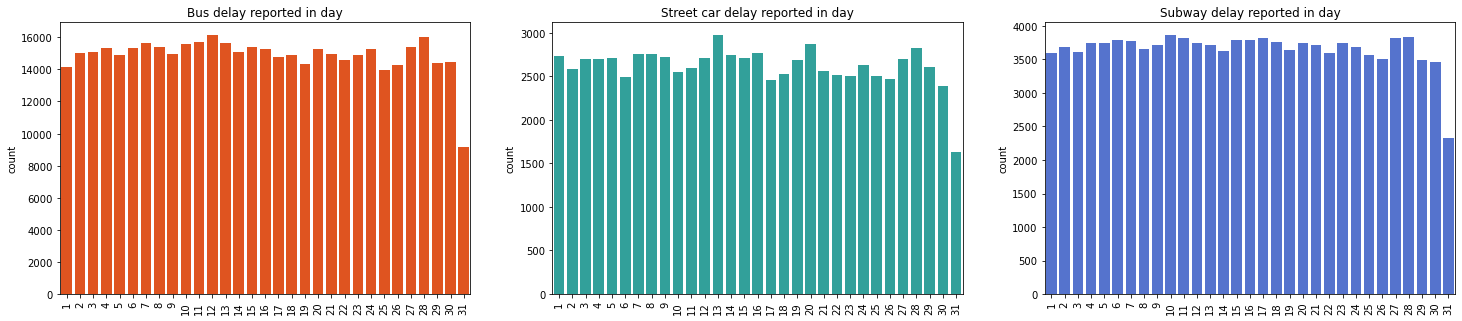

In [95]:
fig, ax = plt.subplots(1,3,figsize=(25,5))

sns.countplot(bus_df.report_day, color="orangered", ax=ax[0]);
labels = ax[0].get_xticklabels();
ax[0].set_xticklabels(labels, rotation=90);
ax[0].set_xlabel("");
ax[0].set_title("Bus delay reported in day");

sns.countplot(streetcar_df.report_day, color="lightseagreen", ax=ax[1]);
labels = ax[1].get_xticklabels();
ax[1].set_xticklabels(labels, rotation=90);
ax[1].set_xlabel("");
ax[1].set_title("Street car delay reported in day");

sns.countplot(subway_df.report_day, color="royalblue", ax=ax[2]);
labels = ax[2].get_xticklabels();
ax[2].set_xticklabels(labels, rotation=90);
ax[2].set_xlabel("");
ax[2].set_title("Subway delay reported in day");

### Report in hour 

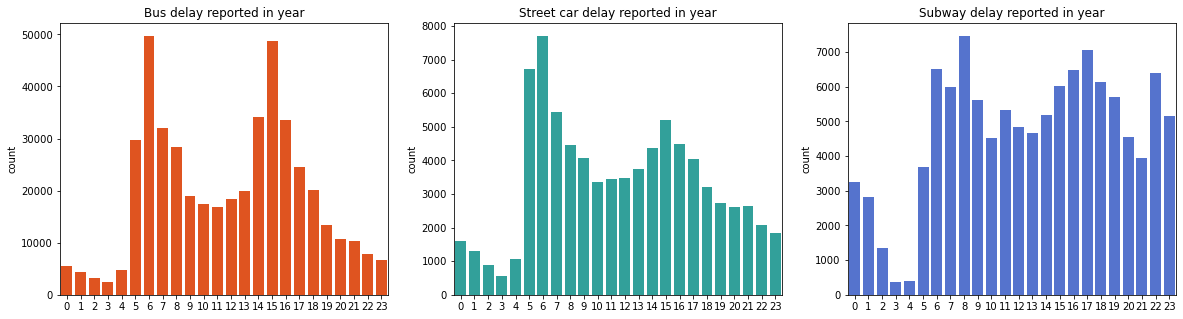

In [96]:
fig, ax = plt.subplots(1,3,figsize=(20,5))

sns.countplot(bus_df.time_hour, color="orangered", ax=ax[0]);
ax[0].set_xlabel("");
ax[0].set_title("Bus delay reported in year");

sns.countplot(streetcar_df.time_hour, color="lightseagreen", ax=ax[1]);
ax[1].set_xlabel("");
ax[1].set_title("Street car delay reported in year");

sns.countplot(subway_df.time_hour, color="royalblue", ax=ax[2]);
ax[2].set_xlabel("");
ax[2].set_title("Subway delay reported in year");

- In the bus dataset, 6 AM and 3 PM has the most delay count.
- For street car, it is also 6 AM and follow by 5 AM. 
- For subway, delays happened mostly in 8 AM and 5 PM which are rush hours. (This fits into my person experience with the subway trains)

### Report in min 

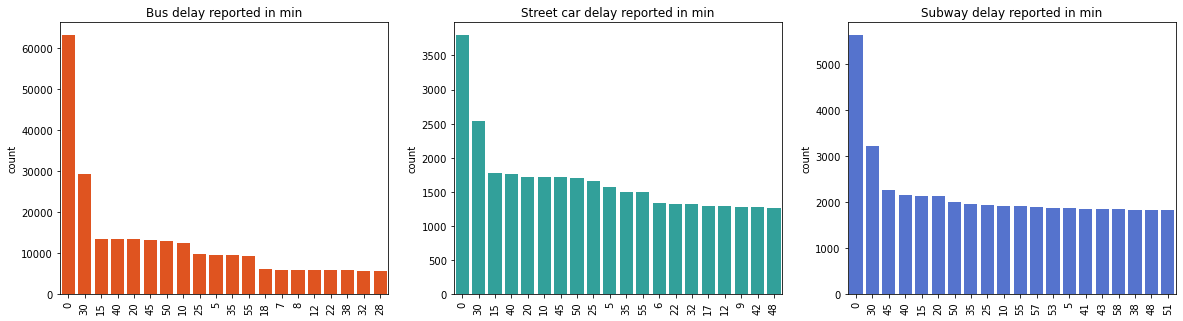

In [102]:
fig, ax = plt.subplots(1,3,figsize=(20,5))

sns.countplot(bus_df.time_min, order= bus_df.time_min.value_counts().iloc[:20].index, color="orangered", ax=ax[0]);
labels = ax[0].get_xticklabels();
ax[0].set_xticklabels(labels, rotation=90);
ax[0].set_xlabel("");
ax[0].set_title("Bus delay reported in min");

sns.countplot(streetcar_df.time_min, order= streetcar_df.time_min.value_counts().iloc[:20].index, color="lightseagreen", ax=ax[1]);
labels = ax[1].get_xticklabels();
ax[1].set_xticklabels(labels, rotation=90);
ax[1].set_xlabel("");
ax[1].set_title("Street car delay reported in min");

sns.countplot(subway_df.time_min, order= subway_df.time_min.value_counts().iloc[:20].index , color="royalblue", ax=ax[2]);
labels = ax[2].get_xticklabels();
ax[2].set_xticklabels(labels, rotation=90);
ax[2].set_xlabel("");
ax[2].set_title("Subway delay reported in min");

### Reported delay at station

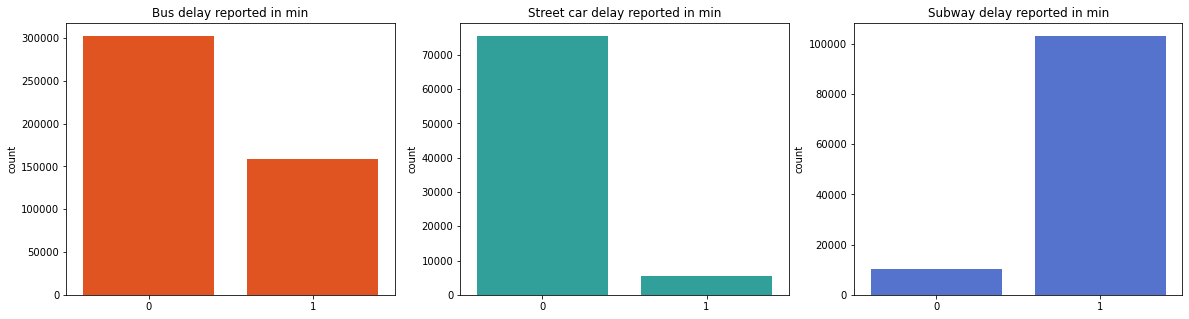

In [104]:
fig, ax = plt.subplots(1,3,figsize=(20,5))

sns.countplot(bus_df.at_station, color="orangered", ax=ax[0]);
ax[0].set_xlabel("");
ax[0].set_title("Bus delay reported in min");

sns.countplot(streetcar_df.at_station, color="lightseagreen", ax=ax[1]);
ax[1].set_xlabel("");
ax[1].set_title("Street car delay reported in min");

sns.countplot(subway_df.at_station, color="royalblue", ax=ax[2]);
ax[2].set_xlabel("");
ax[2].set_title("Subway delay reported in min");

### Reported delay type

- Short delay is less than 10 minutes.
- Medium delay is between 10 to 30 minutes.
- Long delay is more than 30 minutes.

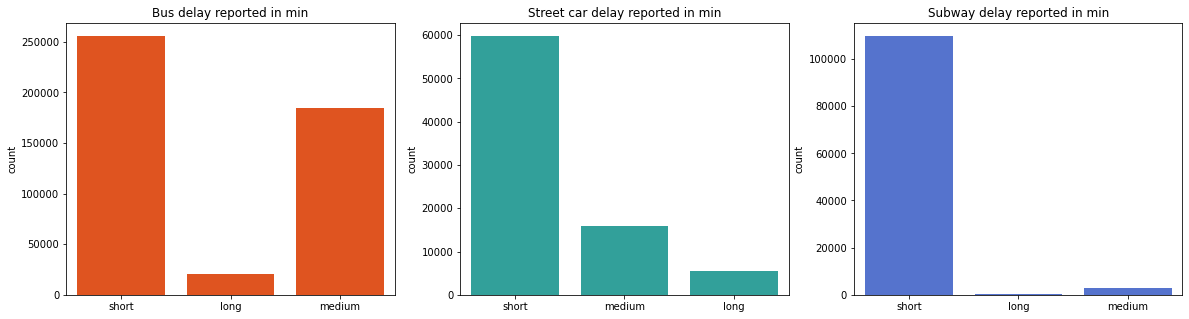

In [106]:
fig, ax = plt.subplots(1,3,figsize=(20,5))

sns.countplot(bus_df.delay_type, color="orangered", ax=ax[0]);
ax[0].set_xlabel("");
ax[0].set_title("Bus delay reported in min");

sns.countplot(streetcar_df.delay_type, color="lightseagreen", ax=ax[1]);
ax[1].set_xlabel("");
ax[1].set_title("Street car delay reported in min");

sns.countplot(subway_df.delay_type, color="royalblue", ax=ax[2]);
ax[2].set_xlabel("");
ax[2].set_title("Subway delay reported in min");

- Out of all 3 different delays, all 3 transits have mostly short delay.
- Bus also has a lot of medium delays.
- Subway has almost no medium and long delays.

### Reported delay in direction
B is both ways

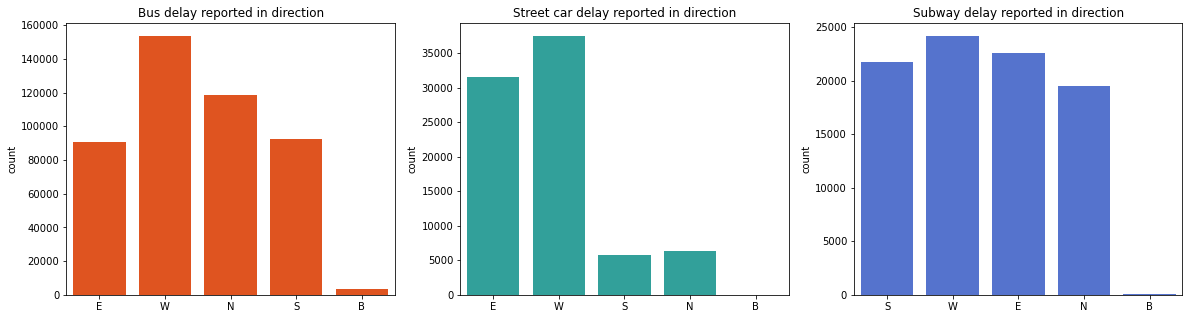

In [130]:
fig, ax = plt.subplots(1,3,figsize=(20,5))

sns.countplot(bus_df.direction_simp, color="orangered", ax=ax[0]);
ax[0].set_xlabel("");
ax[0].set_title("Bus delay reported in direction");

sns.countplot(streetcar_df.direction_simp, color="lightseagreen", ax=ax[1]);
ax[1].set_xlabel("");
ax[1].set_title("Street car delay reported in direction");

sns.countplot(subway_df.Bound, color="royalblue", ax=ax[2]);
ax[2].set_xlabel("");
ax[2].set_title("Subway delay reported in direction");


- All 3 trasits have the most delay heading West.

### Subway line delay

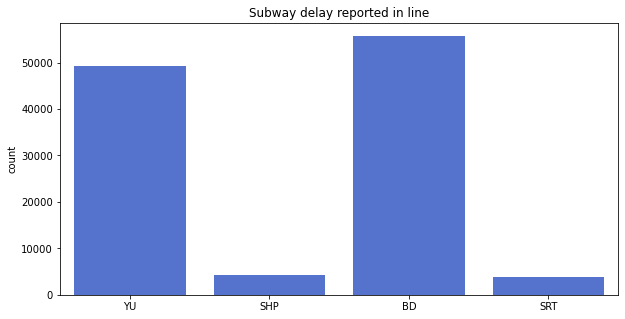

In [143]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

sns.countplot(subway_df.line_simp, color="royalblue");
ax.set_xlabel("");
ax.set_title("Subway delay reported in line");

- Interesting to see that line 2 Bloor-Danforth has more records of delay than line 1 Yonge-University.
- It's expected to see that line 3 Scarborough and line 4 Sheppard have less records since they are much shorter than line 1 and line 2.

In [ ]:
Feature-feature interactions

### Bus

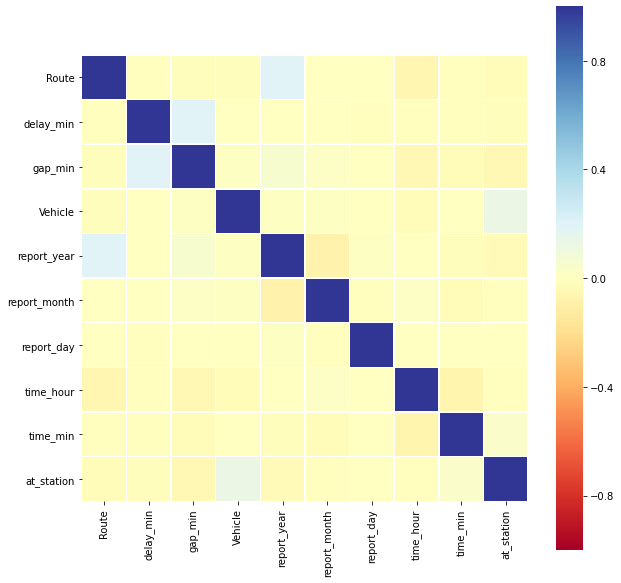

In [156]:
plt.figure(figsize=(10,10));
sns.heatmap(bus_df.corr(), cmap="RdYlBu", vmin=-1, vmax=1, linewidth=.5,square=True);

### Insights
- There are very slight correlations.

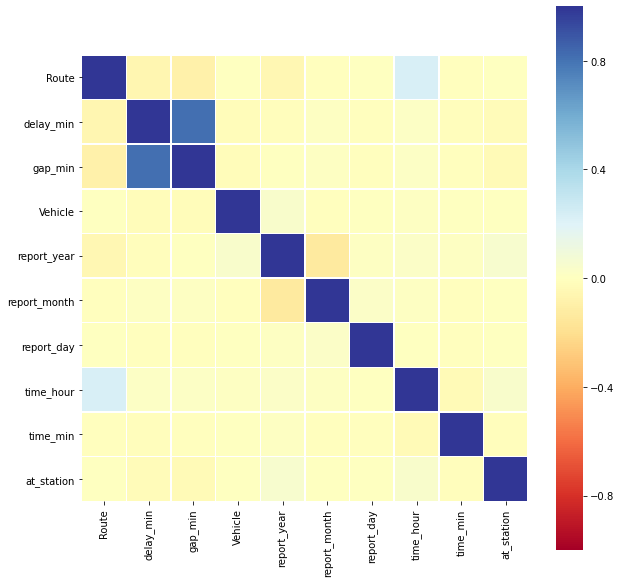

In [157]:
plt.figure(figsize=(10,10));
sns.heatmap(streetcar_df.corr(), cmap="RdYlBu", vmin=-1, vmax=1, linewidth=.5,square=True);

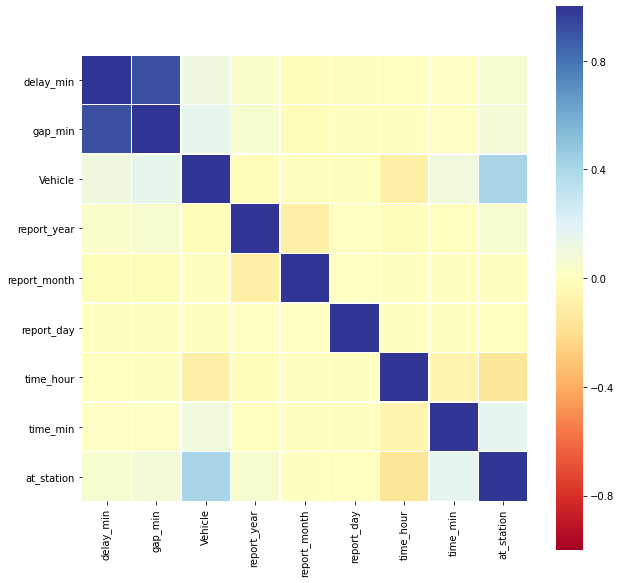

In [158]:
plt.figure(figsize=(10,10));
sns.heatmap(subway_df.corr(), cmap="RdYlBu", vmin=-1, vmax=1, linewidth=.5,square=True);

In [37]:
bus_df_pivots  = bus_df[['report_date', 'Route', 'Time', 'Day', 'Location', 'Incident',
        'gap_min', 'Vehicle', 'report_year',
       'report_month', 'report_day', 'time_hour', 'time_min', 'at_station',
       'delay_type', 'direction_simp','delay_min']]

In [38]:
for i in bus_df_pivots.columns:
    print(i)
    print(pd.pivot_table(bus_df_pivots, index = i , values="delay_min").sort_values("delay_min", ascending=False))

report_date
               delay_min
report_date             
2014-03-01   1305.183246
2018-05-27    112.169643
2018-07-29    108.495935
2019-08-04     92.813333
2018-05-26     92.729730
...                  ...
2020-03-24      9.442623
2015-01-21      9.361789
2015-01-26      9.288660
2020-03-23      8.887218
2020-03-25      8.780347

[2343 rows x 1 columns]
Route
        delay_min
Route            
474    280.000000
140    191.500000
135    162.006803
359    114.000000
62      88.768649
...           ...
459      1.000000
157      1.000000
906      0.750000
383      0.666667
907      0.500000

[335 rows x 1 columns]
Time
              delay_min
Time                   
8:55:00 PM  1040.365145
4:02:00 AM   212.097561
4:50:00 AM   175.393293
5:14:00 AM   140.665339
5:15:00 AM   140.459552
...                 ...
6:23:00 AM     9.200809
6:44:00 AM     9.188889
7:09:00 AM     9.159132
7:01:00 AM     9.125307
7:27:00 AM     8.512360

[1440 rows x 1 columns]
Day
           delay_min
Day    

ValueError: Grouper for 'delay_min' not 1-dimensional

In [159]:
streetcar_df_pivots  = streetcar_df[['report_date', 'Route', 'Time', 'Day', 'Location', 'Incident',
        'gap_min', 'Vehicle', 'report_year',
       'report_month', 'report_day', 'time_hour', 'time_min', 'at_station',
       'delay_type', 'direction_simp','delay_min']]

In [160]:
for i in streetcar_df_pivots.columns:
    print(i)
    print(pd.pivot_table(streetcar_df_pivots, index = i , values="delay_min").sort_values("delay_min", ascending=False))

report_date
              delay_min
report_date            
2014-10-19   161.523810
2020-02-02    97.538462
2014-06-07    74.666667
2016-04-24    72.473684
2016-12-25    68.882353
...                 ...
2016-02-18     5.361702
2014-01-03     5.348837
2014-07-25     4.944444
2019-01-10     4.722222
2014-02-01     4.500000

[2309 rows x 1 columns]
Route
       delay_min
Route           
304    31.608209
317    30.837838
310    25.885714
306    23.096471
301    22.393970
514    20.626667
508    19.241573
502    15.400633
503    14.903863
501    13.258604
506    13.200394
504    12.389170
509    11.883416
505    11.802718
511    11.683461
510    11.531641
512    11.029478
500     7.857143
550     7.333333
591     7.000000
595     6.000000
594     6.000000
596     6.000000
519     6.000000
516     5.500000
375     4.000000
535     1.487805
307     1.000000
513     1.000000
536     0.600000
Time
             delay_min
Time                  
2:04:00 AM  125.083333
4:02:00 AM  100.000000
4:30

ValueError: Grouper for 'delay_min' not 1-dimensional

In [164]:
subway_df_pivots  = subway_df[['report_date', 'Time', 'Day', 'Station', 'Code', 'gap_min',
       'Bound', 'Line', 'Vehicle', 'report_year', 'report_month', 'report_day',
       'time_hour', 'time_min', 'at_station', 'line_simp', 'delay_type','delay_min']]

In [165]:
subway_df.columns

Index(['report_date', 'Time', 'Day', 'Station', 'Code', 'delay_min', 'gap_min',
       'Bound', 'Line', 'Vehicle', 'report_year', 'report_month', 'report_day',
       'time_hour', 'time_min', 'at_station', 'line_simp', 'delay_type'],
      dtype='object')

In [166]:
for i in subway_df_pivots.columns:
    print(i)
    print(pd.pivot_table(subway_df_pivots, index = i , values="delay_min").sort_values("delay_min", ascending=False))

report_date
             delay_min
report_date           
2015-02-17   19.963636
2018-10-20   16.111111
2015-02-07   12.708333
2016-05-19   12.396226
2017-06-03   11.552632
...                ...
2015-03-18    0.382353
2017-05-07    0.250000
2015-03-21    0.211538
2017-07-09    0.157895
2015-12-25    0.153846

[2373 rows x 1 columns]
Time
             delay_min
Time                  
4:47:00 AM   38.600000
6:56:00 AM   13.867470
5:16:00 AM   11.684211
12:35:00 PM  10.904762
8:28:00 PM    9.527778
...                ...
3:05:00 AM    0.000000
3:04:00 AM    0.000000
4:17:00 AM    0.000000
4:18:00 AM    0.000000
3:36:00 AM    0.000000

[1437 rows x 1 columns]
Day
           delay_min
Day                 
Saturday    2.269707
Tuesday     2.163229
Sunday      2.109722
Monday      2.021444
Thursday    2.018725
Wednesday   2.007752
Friday      1.998084
Station
                        delay_min
Station                          
SPADINA TO OSGOODE         159.00
LAWRENCE EAST TO ELLES     148.0

ValueError: Grouper for 'delay_min' not 1-dimensional

# Learnt from Ken Jee eda

In [23]:
bus_df.corr()

,Route,delay_min,gap_min,Vehicle,report_year,report_month,report_day,time_hour,time_min,at_station
Route,1.000000,-0.002287,-0.010086,-0.014714,0.188401,0.002492,0.006553,-0.057798,-0.001819,-0.022805
delay_min,-0.002287,1.000000,0.191835,0.001026,0.007215,0.001561,-0.001797,-0.007802,-0.002024,-0.009279
gap_min,-0.010086,0.191835,1.000000,0.014617,0.050941,0.016782,0.002742,-0.043344,-0.016986,-0.041849
Vehicle,-0.014714,0.001026,0.014617,1.000000,0.011695,0.008981,0.002516,-0.019045,0.004048,0.126753
report_year,0.188401,0.007215,0.050941,0.011695,1.000000,-0.084162,0.012759,0.002848,-0.009440,-0.033340
report_month,0.002492,0.001561,0.016782,0.008981,-0.084162,1.000000,-0.002002,0.020672,-0.023485,-0.006784
report_day,0.006553,-0.001797,0.002742,0.002516,0.012759,-0.002002,1.000000,0.004576,0.000813,0.003564
time_hour,-0.057798,-0.007802,-0.043344,-0.019045,0.002848,0.020672,0.004576,1.000000,-0.064168,-0.001531
time_min,-0.001819,-0.002024,-0.016986,0.004048,-0.009440,-0.023485,0.000813,-0.064168,1.000000,0.031501
at_station,-0.022805,-0.009279,-0.041849,0.126753,-0.033340,-0.006784,0.003564,-0.001531,0.031501,1.000000


<AxesSubplot:>

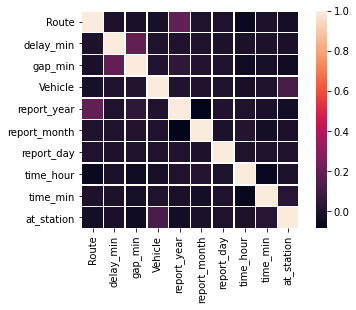

In [24]:
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(bus_df.corr(),  square=True, linewidths=.5)

In [25]:
bus_df.columns

Index(['report_date', 'Route', 'Time', 'Day', 'Location', 'Incident',
       'delay_min', 'gap_min', 'Direction', 'Vehicle', 'report_year',
       'report_month', 'report_day', 'time_hour', 'time_min', 'at_station',
       'delay_type', 'direction_simp'],
      dtype='object')

In [26]:
bus_df_cat = bus_df[['Day','Incident','delay_type','direction_simp']]

In [28]:
bus_df_large_cat = bus_df[['report_date',"Time"]]

graph for report_date: total = 20


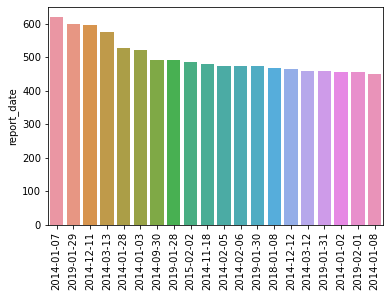

graph for Time: total = 20


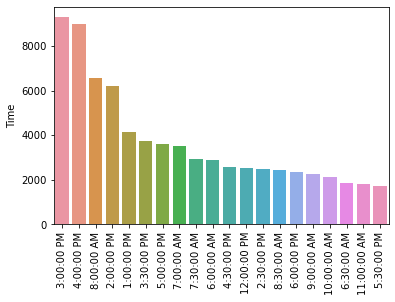

In [29]:
for i in bus_df_large_cat.columns:
    cat_num = bus_df_large_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" %(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [30]:
bus_df.columns

Index(['report_date', 'Route', 'Time', 'Day', 'Location', 'Incident',
       'delay_min', 'gap_min', 'Direction', 'Vehicle', 'report_year',
       'report_month', 'report_day', 'time_hour', 'time_min', 'at_station',
       'delay_type', 'direction_simp'],
      dtype='object')

In [31]:
pd.pivot_table(bus_df, index="Incident", values="delay_min").sort_values("delay_min", ascending = False)

,delay_min
Incident,
Diversion,155.657044
General Delay,17.005106
Emergency Services,12.633554
Investigation,12.131881
Vision,11.825309
Mechanical,11.478330
Management,10.888889
Late Leaving Garage - Mechanical,10.448615
Late Leaving Garage,10.426253


In [32]:
pd.set_option("display.max_rows", 50)

In [33]:
pd.pivot_table(bus_df, index=["Incident","direction_simp"], values="delay_min", aggfunc="count").sort_values("delay_min", ascending=False)

delay_min
Incident                     direction_simp           
General Delay                W                   55150
Mechanical                   N                   49355
                             E                   42248
                             S                   41013
                             W                   40554
...                                                ...
Management                   E                       2
                             S                       1
Vision                       B                       1
Late Leaving Garage - Vision B                       1
Management                   W                       1

[64 rows x 1 columns]

In [34]:
pd.pivot_table(bus_df[bus_df.direction_simp == "S"], index="Incident", values="delay_min").sort_values("delay_min", ascending=False)

,delay_min
Incident,
Diversion,113.025660
General Delay,15.905960
Emergency Services,12.500444
Investigation,11.980609
Vision,11.686747
Late Leaving Garage - Vision,11.571429
Mechanical,11.545729
Late Leaving Garage - Mechanical,11.283988
Late Leaving Garage - Operator,10.960526


In [36]:
pd.pivot_table(bus_df, index="direction_simp", values="delay_min")

,delay_min
direction_simp,
B,20.491929
E,16.210356
N,16.187035
S,17.050201
W,28.699581


In [39]:
pd.pivot_table(bus_df_pivots, index= "Incident", columns="at_station", values="delay_min", aggfunc="count")

at_station,0,1
Incident,,
Diversion,25544,2168
Emergency Services,7711,1963
General Delay,49635,16947
Investigation,37329,7598
Late Leaving Garage,40199,24624
Late Leaving Garage - Management,262,145
Late Leaving Garage - Mechanical,998,627
Late Leaving Garage - Operator,886,417
Late Leaving Garage - Vision,101,43


In [171]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [187]:
bus_df_notna = bus_df[bus_df['Location'].notna()]

In [42]:
bus_df_notna

,report_date,Route,Time,Day,Location,Incident,delay_min,gap_min,Direction,Vehicle,report_year,report_month,report_day,time_hour,time_min,at_station,delay_type,direction_simp
0,2014-01-01,95,12:23:00 AM,Wednesday,YORK MILLS STATION,Mechanical,10.0,20.0,E,1734.0,2014,1,1,0,23,1,short,E
1,2014-01-01,102,12:55:00 AM,Wednesday,ENTIRE RUN FOR ROUTE,General Delay,33.0,66.0,b/w,8110.0,2014,1,1,0,55,0,long,W
2,2014-01-01,54,1:28:00 AM,Wednesday,LAWRENCE AND WARDEN,Mechanical,10.0,20.0,WB,7478.0,2014,1,1,1,28,0,short,W
3,2014-01-01,112,1:30:00 AM,Wednesday,KIPLING STATION,Emergency Services,18.0,36.0,N,8084.0,2014,1,1,1,30,1,medium,N
4,2014-01-01,24,1:37:00 AM,Wednesday,VP AND ELLESMERE,Investigation,10.0,20.0,n,7843.0,2014,1,1,1,37,0,short,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461400,2020-05-31,25,11:13:00 PM,Sunday,DON MILLS AT LAWRENCE,Mechanical,10.0,20.0,N/B,8671.0,2020,5,31,23,13,0,short,N
461401,2020-05-31,163,11:15:00 PM,Sunday,LAWRENCE WEST STATION,Mechanical,14.0,28.0,S/B,8311.0,2020,5,31,23,15,1,medium,S
461402,2020-05-31,47,11:30:00 PM,Sunday,YORKDALE,Mechanical,20.0,40.0,S/B,1057.0,2020,5,31,23,30,0,medium,S
461403,2020-05-31,62,11:35:00 PM,Sunday,BROADVIEW STATION,Mechanical,20.0,40.0,E/B,8513.0,2020,5,31,23,35,1,medium,E


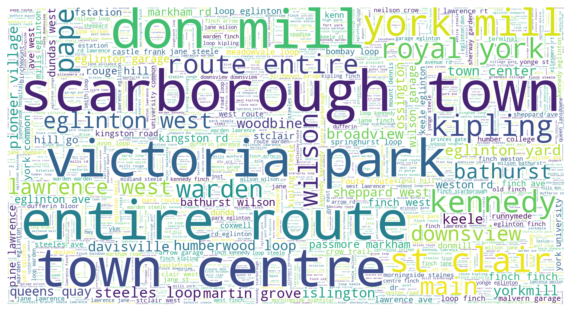

In [189]:
words = " ".join(bus_df_notna['Location'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

unwanted = ['station'

text = " ".join([ele for ele in words_filtered if ele not in unwanted])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =1500, height = 800)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [169]:
streetcar_df_notna = streetcar_df[streetcar_df['Location'].notna()]

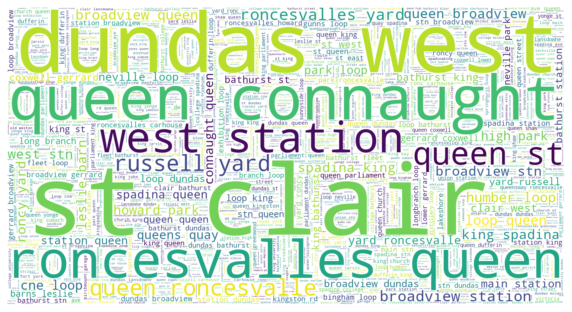

In [172]:
words = " ".join(streetcar_df_notna['Location'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =1500, height = 800)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [184]:
# Only look at record at station
subway_df_station = subway_df[subway_df['Station'].str.contains('STATION')]

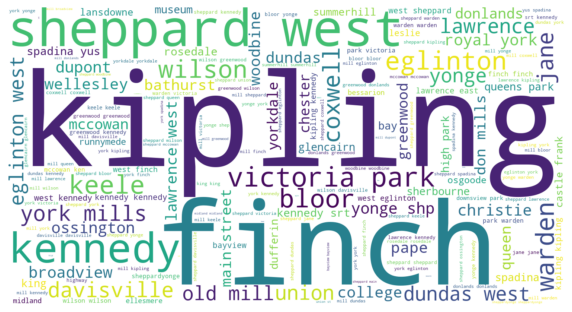

In [191]:
words = " ".join(subway_df_station['Station'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

unwanted = ['station','bd']

text = " ".join([ele for ele in words_filtered if ele not in unwanted])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =1500, height = 800)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()